# Supervised Learning 

In this section will cover the different type of supervided learning and the algorithms that are involved in this processes.

There are two different types of supervied learning techniques;

1. CLassification

2. Regression


# Demo: Regression

**Problem Statement:**

The Advertising dataset captures sales revenue generated with respect to advertisement spends 
across multiple channels like radio, tv, and newspaper.


**Objective:**

Build a linear regression model to:

• Interpret the coefficients of the model

• Make predictions

• Find and analyze model residuals

• Evaluate model efficiency using RMSE and R-Square values


In [28]:
# Importing the libraries
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline

In [29]:
data = pd.read_csv("Datasets/Advertising.csv", index_col=0)
data.head()

# These are the independent variables in the data set 
data.columns = ["TV", "Radio", "Newspaper", "Sales"]

In [30]:
data.shape

(200, 4)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

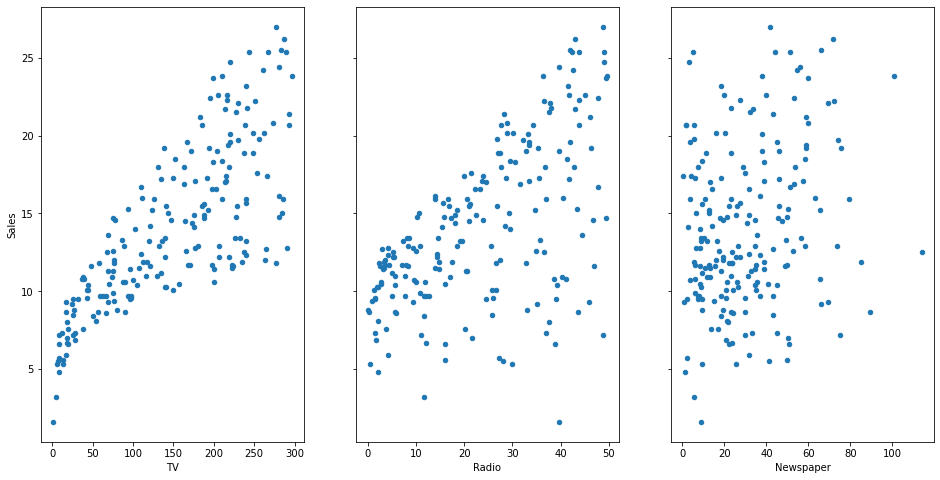

In [31]:
# Visualizing the relationship between the features and targets
# variable sales using scatter plots

fig,axs = plt.subplots(1,3, sharey=True)
data.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1])
data.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2])


In [38]:
# Applying linear regression to estimate the 
# relationship between Tv ad spending and sales 
# Use Tv as as the feature column

feature_cols = ["TV"]

# X is the independent variable
x = data[feature_cols]

# y is the depended variable
y = data.Sales

In [39]:
# building the linear regression model 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# fitting the model on x and y
lm.fit(x,y)

LinearRegression()

In [41]:
# printing the intercept and the 
# coefficient of the resulting linear equation.
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


**Prediction**

Now we have a linear equation we can use this for prediction. Lets say we have a new market where TV advertising spends were $50 0000. What would be predict for sales in that market. We canuse the previous values to calculate for sales 

In [43]:
new_market = 7.032593549127693 + 0.04753664 * 50
new_market

9.409425549127693

In [45]:
# Predicting the new x values 
X_new = pd.DataFrame({'TV':[50]})

# Using the above equation we would now predict the sales of 
# 9.4094 widgets in that market 
X_new.head()

,TV
0,50


In [46]:
lm.predict(X_new)

array([9.40942557])

In [50]:
# making predictions of the smallest and the largest observed values of x
# then use the predicted values to plot the least squares line 
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [51]:
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

**Scatter Plot**

Looking at the plot we can say we have a high bias and low variance model. Hypothesis testing and p-values, using the null hypothesis lets assume there is no relationship between tv ads and sales. Now lets test this hypothesis. We shall reject the null hypothesis if the 95% confidence interval does not include zero. P-values represents the possibility that the coefficient is actually zero. In our case the p-value of tvis far less than 0.5 meaning to say there is a relationship between tv ads and sales 

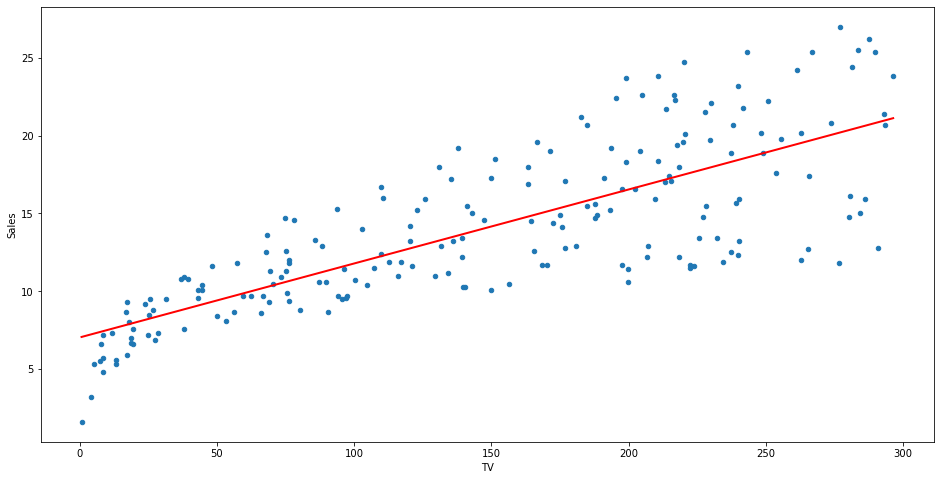

In [53]:
# Initialize the scatter plot for TV and Sales 
# Plotting the least squares line 
data.plot(kind='scatter', x='TV', y='Sales', figsize=(16,8))
plt.plot(X_new, preds, c='red', linewidth=2)

In [54]:
# Hypothesis testing 
import statsmodels.formula.api as smf

lm = smf.ols(formula='Sales ~ TV', data=data).fit()

In [55]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [56]:
# p-values for the modeled coefficients 
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [58]:
# Evaluating how well the model fit the data 
# we use the r_squared value
lm.rsquared

0.611875050850071

**Multiple Linear Regression Model**

Ealier we were justing using the TV as the feature column this time we will be using all the independent values. Most of the code will remain the same.


In [61]:
feature_col = ['TV', 'Radio', 'Newspaper']
x = data[feature_col]
y = data.Sales

from sklearn import model_selection

# Creating a trained test
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x,y,test_size=0.3, random_state=42)

In [62]:
# Applying Linear Regression

lm = LinearRegression()
lm.fit(x,y)

LinearRegression()